# Closed system simulation with experimental data markers

In this simulation we have a system of 5 liters in which we start with Next = 1000/500/200, some Nint (measured) of some mass (m). After this we "feed" for a period of 7/3.5/2.33 days, i.e. solve the "feeding" part of the simulation. After that, we add 1000/500/200 uM to the last value of Next and keep "feeding". After one duration (7 days) we reset the water, mass and the amplitude to the beginning of the first cycle. The only difference from the t_0 is the Nint which is accumulating all the effects through the time. The mass is reset to m_0 and Next is reset to 1000 ppm (per something per something)


In [1]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions import *

import datetime

In [2]:
# statistics functions

import scikit_posthocs as scp

In [3]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters',header=None)

# Import bottles data into df5
df5 = x2.parse('Bottles')

In [4]:
df5.head()

,Bottle,Exp,Brine:ASW,density,Dwi,Ni,P,NO3,NO3-N,NO3.1,...,N_assimilation_day,N_Saturation,Final_NO3,Comment,NO3_removal,N_removal,N_removal_day,NO3_removal_efficiency,Duration,Diluted
0,2,1,1:0,1.0,0.15150,3.014334,No,265.714286,60.0,4274.0,...,0.197800,yes,NaN,NaN,NaN,NaN,NaN,NaN,Week,No
1,3,1,1:0,1.0,0.15825,3.014334,No,265.714286,60.0,4274.0,...,0.349681,yes,NaN,NaN,NaN,NaN,NaN,NaN,Week,No
2,4,1,1:0,2.0,0.30150,3.014334,No,265.714286,60.0,4274.0,...,0.833286,yes,NaN,NaN,NaN,NaN,NaN,NaN,Week,No
3,5,1,1:0,2.0,0.30000,3.014334,No,265.714286,60.0,4274.0,...,0.532428,yes,NaN,NaN,NaN,NaN,NaN,NaN,Week,No
4,7,1,0.5:0.5,1.0,0.15150,3.014334,No,132.857143,30.0,2137.0,...,1.265124,yes,NaN,NaN,NaN,NaN,NaN,NaN,Week,Yes


In [5]:
# All normalized N assimilation rate results by exp
dall = df5[(np.isnan(df5.N_assimilation_day)!= True)]
rp.summary_cont(dall['N_assimilation_day'].groupby(dall['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
1,12,0.8902,0.4069,0.1175,0.6316,1.1487
2,11,0.7380,0.4611,0.1390,0.4282,1.0477
3,7,0.2713,0.6372,0.2408,-0.3179,0.8606
4,11,0.8397,3.0330,0.9145,-1.1979,2.8774
5,12,-0.9249,1.7462,0.5041,-2.0344,0.1846


In [6]:
#  normalized N assimilation rate results by P (yes/no)
dP = df5[(np.isnan(df5.N_assimilation_day)!= True)&(df5['Exp'] == 3)]
rp.summary_cont(dP['N_assimilation_day'].groupby(dP['P']))

,N,Mean,SD,SE,95% Conf.,Interval
P,,,,,,
No,3,0.5856,0.8854,0.5112,-1.6138,2.7851
Yes,4,0.0356,0.3413,0.1706,-0.5074,0.5786


In [7]:
#  normalized N assimilation rate results by P (yes/no)
dDur = df5[(np.isnan(df5.N_assimilation_day)!= True)&(df5['Duration'] == 'Day')]
rp.summary_cont(dDur['N_assimilation_day'].groupby(dDur['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
4,11,0.8397,3.0330,0.9145,-1.1979,2.8774
5,12,-0.9249,1.7462,0.5041,-2.0344,0.1846


In [8]:
#  normalized N assimilation rate results by P (yes/no)
dDur = df5[(np.isnan(df5.N_assimilation_day)!= True)&(df5['Duration'] == 'Day')]
rp.summary_cont(dDur['N_removal_day'].groupby(dDur['Exp']))

,N,Mean,SD,SE,95% Conf.,Interval
Exp,,,,,,
4,11,13.7038,8.0913,2.4396,8.2681,19.1396
5,12,5.4264,5.6212,1.6227,1.8548,8.9980


In [9]:
#  DGR results by P (yes/no)
dP = df5[(np.isnan(df5.N_assimilation_day)!= True)&(df5['Exp'] == 3)]
rp.summary_cont(dP['DGR'].groupby(dP['P']))

,N,Mean,SD,SE,95% Conf.,Interval
P,,,,,,
No,3,0.0989,0.1083,0.0625,-0.1702,0.3680
Yes,3,0.0441,0.0520,0.0300,-0.0851,0.1733


In [10]:
rp.summary_cont(dall['N_assimilation_day'].groupby(dall['density']))

C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\meiro\Anaconda3new\lib\site-packages\scipy\stats\_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
density,,,,,,
0.0,6,0.0000,0.0000,0.0000,NaN,NaN
1.0,6,0.8080,0.4736,0.1933,0.3110,1.3050
2.0,25,0.4443,1.2770,0.2554,-0.0828,0.9714
3.0,4,0.7975,0.4049,0.2025,0.1532,1.4418
5.0,6,-0.0369,1.4510,0.5924,-1.5597,1.4858
7.5,3,-0.5096,2.9461,1.7009,-7.8280,6.8089
10.0,3,0.4804,6.4977,3.7515,-15.6609,16.6217


In [11]:
# Mann-Whitney U Test between dliuted and non-diluted brine - N_assimilation_day
stats.mannwhitneyu(dall[(dall.density != 0)&(dall.Diluted == 'Yes')].N_assimilation_day, dall[(dall.density != 0)&(dall.Diluted == 'No')].N_assimilation_day)

MannwhitneyuResult(statistic=89.0, pvalue=0.00029663038866156765)

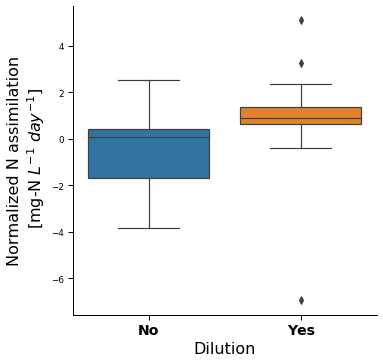

In [12]:
# N_assimilation_day in different dilutions (Yes/No)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'Diluted', y = 'N_assimilation_day', data = dall[(dall.density != 0)],kind='box').set(xlabel='Dilution', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')
fig.set_xticklabels(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig.set_ylabel(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#fig = sns.stripplot(x = 'Diluted', y = 'N_assimilation_day', data = dall,color='k',hue='Duration').set(xlabel='Dilution', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

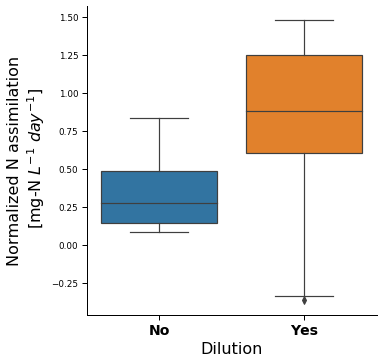

In [34]:
# N_assimilation_day in different dilutions (Yes/No)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'Diluted', y = 'N_assimilation_day', data = dall[(dall.Duration == 'Week')&(dall.density != 0)],kind='box').set(xlabel='Dilution', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')
fig.set_xticklabels(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig.set_ylabel(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#fig = sns.stripplot(x = 'Diluted', y = 'N_assimilation_day', data = dall,color='k',hue='Duration').set(xlabel='Dilution', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

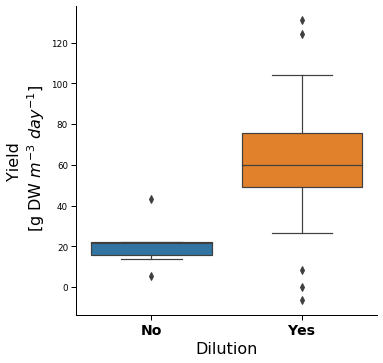

In [35]:
# N_assimilation_day in different dilutions (Yes/No)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'Diluted', y = 'Yield', data = dall[(dall.Duration == 'Week')&(dall.density != 0)],kind='box').set(xlabel='Dilution', ylabel='Yield\n [g DW $m^{-3}$ $day^{-1}$]')
fig.set_xticklabels(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig.set_ylabel(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#fig = sns.stripplot(x = 'Diluted', y = 'N_assimilation_day', data = dall,color='k',hue='Duration').set(xlabel='Dilution', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

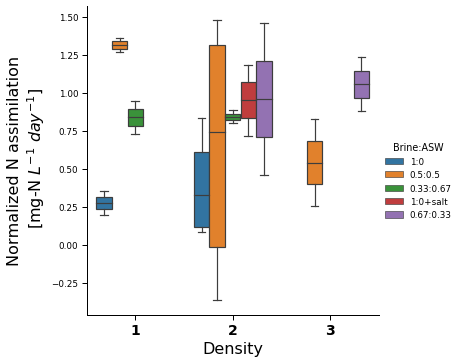

In [30]:
# N_assimilation_day in different densities
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'density', y = 'N_assimilation_day', data = dall[(dall.Duration == 'Week')&(dall.density != 0)],kind='box',hue = 'Brine:ASW').set(xlabel='Density', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')
fig.set_xticklabels(['1', '2','3'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig.set_ylabel(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#fig = sns.stripplot(x = 'Diluted', y = 'N_assimilation_day', data = dall,color='k',hue='Duration').set(xlabel='Dilution', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

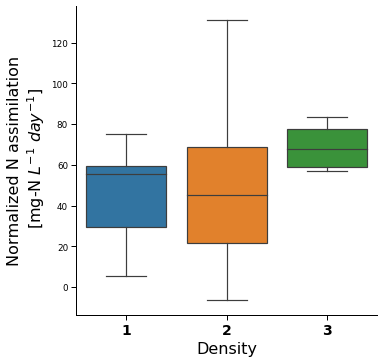

In [33]:
# N_assimilation_day in different densities
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'density', y = 'Yield', data = dall[(dall.Duration == 'Week')&(dall.density != 0)],kind='box').set(xlabel='Density', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')
fig.set_xticklabels(['1', '2','3'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig.set_ylabel(['No', 'Yes'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#fig = sns.stripplot(x = 'Diluted', y = 'N_assimilation_day', data = dall,color='k',hue='Duration').set(xlabel='Dilution', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [13]:
# Mann-Whitney U Test between 1-day and 1-week treatments (all densities except 0) - N_assimilation_day

stats.mannwhitneyu(dall[(dall.density != 0)&(dall.Duration == 'Day')].N_assimilation_day, dall[(dall.density != 0)&(dall.Duration == 'Week')].N_assimilation_day)

MannwhitneyuResult(statistic=210.0, pvalue=0.13454459643292188)

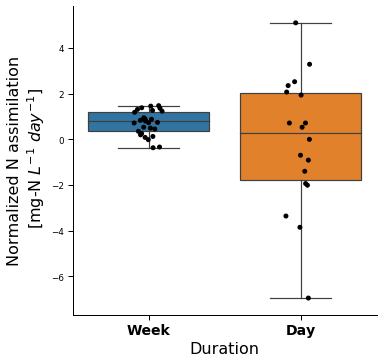

In [14]:
# N_assimilation_day in different durations - all densities except 0
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'Duration', y = 'N_assimilation_day', data = dall[(dall.density != 0)],kind='box')
fig.set_xticklabels(['Day', 'Week'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'N_assimilation_day', data = dall[(dall.density != 0)],color='k').set(xlabel='Duration', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [15]:
# Mann-Whitney U Test between 1-day and 1-week treatments (only diluted, all densities except 0) - N_assimilation_day

stats.mannwhitneyu(dall[(dall.density != 0)&(dall.Duration == 'Day')&(dall.Diluted == 'Yes')].N_assimilation_day, dall[(dall.density != 0)&(dall.Duration == 'Week')&(dall.Diluted == 'Yes')].N_assimilation_day)

MannwhitneyuResult(statistic=76.0, pvalue=0.12889074113731785)

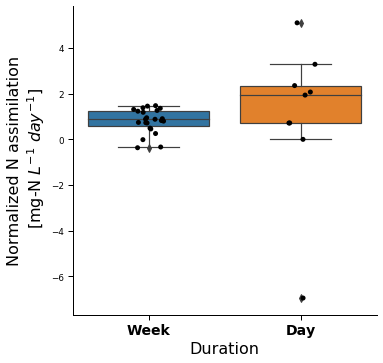

In [16]:
# N_assimilation_day in different durations - all densities except 0
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
dall_ND = dall[(dall.density != 0)&(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'Duration', y = 'N_assimilation_day', data = dall_ND,kind='box')
fig.set_xticklabels(['Day', 'Week'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'N_assimilation_day', data = dall_ND,color='k').set(xlabel='Duration', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [17]:
# Mann-Whitney U Test between N_assimilation_day and N_removal_day - all densities
#dall = df5[(np.isnan(dfall.N_assimilation_day)!= True)]
stats.mannwhitneyu(dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)].N_assimilation_day, dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)].N_removal_day)

MannwhitneyuResult(statistic=14.0, pvalue=1.528192669806368e-06)

In [18]:
# Mann-Whitney U Test between N_assimilation_day and N_removal_day - density <= 2g FW / l
#dall = df5[(np.isnan(dfall.N_assimilation_day)!= True)]
stats.mannwhitneyu(dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)&(dall.density <= 2)].N_assimilation_day, dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)&(dall.density < 5)].N_removal_day)

MannwhitneyuResult(statistic=4.0, pvalue=0.015319493968851633)

Text(0.5, 1.0, 'N assimilation vs removal')

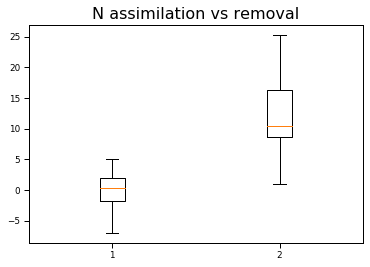

In [19]:
# comparison between assimilation and removal
x1 = dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)].N_assimilation_day
x2 = dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)].N_removal_day
x = [x1,x2]
plt.boxplot(x)

# x-axis labels
#ax.set_xticklabels(['N_assimilation', 'N_removal'])

# Adding title
plt.title("N assimilation vs removal")

     
# show plot
#plt.show(ax)

In [37]:
# kruskal test - comparing daily N assimilation rate in different densities (diluted, week duration)
d = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall['Diluted']=='Yes')]
sp.stats.kruskal(d[(d['Duration'] == 'Week')&(d['density'] == 1)]['N_assimilation_day'],
                d[(d['Duration'] == 'Week')&(d['density'] == 2)]['N_assimilation_day'],
                d[(d['Duration'] == 'Week')&(d['density'] == 3)]['N_assimilation_day'])

# There is a significant difference between fluxes

KruskalResult(statistic=1.1228260869565219, pvalue=0.5704024906021594)

In [38]:
# kruskal test - comparing yield in different densities (diluted, week duration)
d = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall['Diluted']=='Yes')]
sp.stats.kruskal(d[(d['Duration'] == 'Week')&(d['density'] == 1)]['Yield'],
                d[(d['Duration'] == 'Week')&(d['density'] == 2)]['Yield'],
                d[(d['Duration'] == 'Week')&(d['density'] == 3)]['Yield'])

# There is a significant difference between fluxes

KruskalResult(statistic=0.8848417408506335, pvalue=0.6424791780608364)

In [53]:
# kruskal test - comparing yield in different densities (diluted, week duration)
d = dall[(np.isnan(dall.Yield)!= True)&(dall['Diluted']=='Yes')]
sp.stats.kruskal(d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '0.5:0.5')]['Yield'],
                d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '0.33:0.67')]['Yield'],
                d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '0.67:0.33')]['Yield'],
                d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '1:0+salt')]['Yield'])

# There is a significant difference between fluxes
#d

KruskalResult(statistic=2.2499239138704947, pvalue=0.5221819714304328)

In [54]:
# kruskal test - comparing yield in different densities (diluted, week duration)
d = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall['Diluted']=='Yes')]
sp.stats.kruskal(d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '0.5:0.5')]['N_assimilation_day'],
                d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '0.33:0.67')]['N_assimilation_day'],
                d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '0.67:0.33')]['N_assimilation_day'],
                d[(d['Duration'] == 'Week')&(d['Brine:ASW'] == '1:0+salt')]['N_assimilation_day'])

# There is a significant difference between fluxes
#d

KruskalResult(statistic=0.6428571428571388, pvalue=0.8865548644479578)

In [20]:
# kruskal test - comparing daily N removal rate in different densities (diluted)
d = dall[(np.isnan(dall.N_removal_day)!= True)&(dall['Diluted']=='Yes')]
sp.stats.kruskal(d[(d['Duration'] == 'Day')&(d['density'] == 0)]['N_removal_day'],
                d[(d['Duration'] == 'Day')&(d['density'] == 2)]['N_removal_day'],
                d[(d['Duration'] == 'Day')&(d['density'] == 5)]['N_removal_day'],
                d[(d['Duration'] == 'Day')&(d['density'] == 10)]['N_removal_day'])

# There is a significant difference between fluxes

KruskalResult(statistic=9.452054794520553, pvalue=0.02384692526594434)

In [21]:
# kruskal test - comparing daily N removal rate in different densities (non-diluted)
d = dall[(np.isnan(dall.N_removal_day)!= True)&(dall['Diluted']=='No')]
sp.stats.kruskal(d[(d['Duration'] == 'Day')&(d['density'] == 0)]['N_removal_day'],
                d[(d['Duration'] == 'Day')&(d['density'] == 2)]['N_removal_day'],
                d[(d['Duration'] == 'Day')&(d['density'] == 5)]['N_removal_day'],
                d[(d['Duration'] == 'Day')&(d['density'] == 7.5)]['N_removal_day'])

# There is a significant difference between fluxes

KruskalResult(statistic=9.512820512820511, pvalue=0.02319536210572101)

Text(0.5, 1.0, 'Daily N removal for different densities')

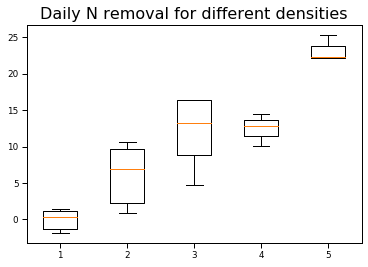

In [56]:
# comparison between removal in different densities
x1 = dall[(np.isnan(dall.N_removal_day)!= True)&(dall.density == 0)].N_removal_day
x2 = dall[(np.isnan(dall.N_removal_day)!= True)&(dall.density == 2)].N_removal_day
x3 = dall[(np.isnan(dall.N_removal_day)!= True)&(dall.density == 5)].N_removal_day
x4 = dall[(np.isnan(dall.N_removal_day)!= True)&(dall.density == 7.5)].N_removal_day
x5 = dall[(np.isnan(dall.N_removal_day)!= True)&(dall.density == 10)].N_removal_day

x = [x1,x2,x3,x4,x5]
ax = plt.boxplot(x)

# x-axis labels
#ax.set_xticklabels(['0','2', '5','10'])

# Adding title
plt.title("Daily N removal for different densities")

     
# show plot
#plt.show(ax)

Text(0.5, 1.0, 'Daily N assimilation for different densities\n 1-week experiments')

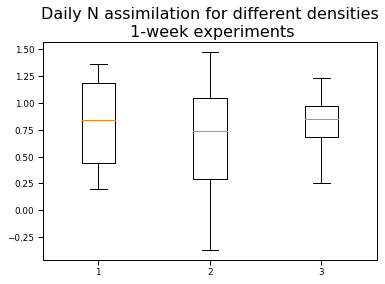

In [23]:
# comparison between assimilation in different densities
x1 = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall.Duration == 'Week')&(dall.density == 1)].N_assimilation_day
x2 = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall.Duration == 'Week')&(dall.density == 2)].N_assimilation_day
x3 = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall.Duration == 'Week')&(dall.density == 3)].N_assimilation_day

x = [x1,x2,x3]
ax = plt.boxplot(x)

# x-axis labels
#ax.set_xticklabels(['0','2', '5','10'])

# Adding title
plt.title("Daily N assimilation for different densities\n 1-week experiments")

     
# show plot
#plt.show(ax)

Text(0.5, 1.0, 'Yield for different densities\n 1-week experiments')

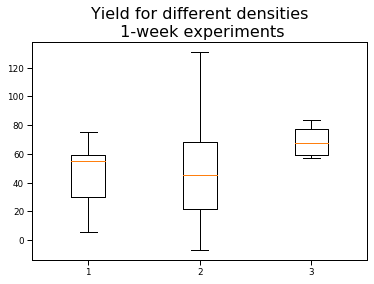

In [36]:
# comparison between assimilation in different densities
x1 = dall[(np.isnan(dall.Yield)!= True)&(dall.Duration == 'Week')&(dall.density == 1)].Yield
x2 = dall[(np.isnan(dall.Yield)!= True)&(dall.Duration == 'Week')&(dall.density == 2)].Yield
x3 = dall[(np.isnan(dall.Yield)!= True)&(dall.Duration == 'Week')&(dall.density == 3)].Yield

x = [x1,x2,x3]
ax = plt.boxplot(x)

# x-axis labels
#ax.set_xticklabels(['0','2', '5','10'])

# Adding title
plt.title("Yield for different densities\n 1-week experiments")

     
# show plot
#plt.show(ax)

Text(0.5, 1.0, 'Daily N assimilation for different densities\n 1-week experiments')

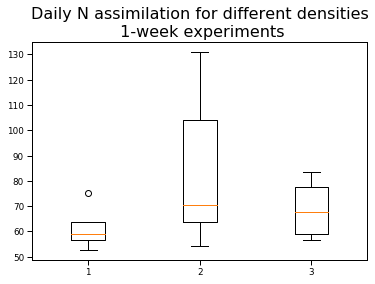

In [26]:
# comparison between assimilation in different densities
x1 = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall.Diluted == 'Yes')&(dall.Exp != 3)&(dall.Duration == 'Week')&(dall.density == 1)].Yield
x2 = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall.Diluted == 'Yes')&(dall.Exp != 3)&(dall.Duration == 'Week')&(dall.density == 2)].Yield
x3 = dall[(np.isnan(dall.N_assimilation_day)!= True)&(dall.Diluted == 'Yes')&(dall.Exp != 3)&(dall.Duration == 'Week')&(dall.density == 3)].Yield

x = [x1,x2,x3]
ax = plt.boxplot(x)

# x-axis labels
#ax.set_xticklabels(['0','2', '5','10'])

# Adding title
plt.title("Daily N assimilation for different densities\n 1-week experiments")

     
# show plot
#plt.show(ax)

In [57]:
# Mann-Whitney U Test between N_assimilation_day and N_removal_day - all densities
#dall = df5[(np.isnan(dfall.N_assimilation_day)!= True)]
stats.mannwhitneyu(dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)&(dall.Exp == 4)].N_assimilation_day, dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)&(dall.Exp == 5)].N_assimilation_day)

MannwhitneyuResult(statistic=16.0, pvalue=0.017034597572071968)

In [59]:
# Mann-Whitney U Test between N_removal_day in diluted and non-diluted brine - all densities, 1 day
#dall = df5[(np.isnan(dfall.N_assimilation_day)!= True)]
stats.mannwhitneyu(dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)&(dall.Exp == 4)].N_removal_day, dall[(dall.density != 0)&(np.isnan(dall.N_removal_day)!= True)&(dall.Exp == 5)].N_removal_day)

MannwhitneyuResult(statistic=10.0, pvalue=0.004019437313372977)

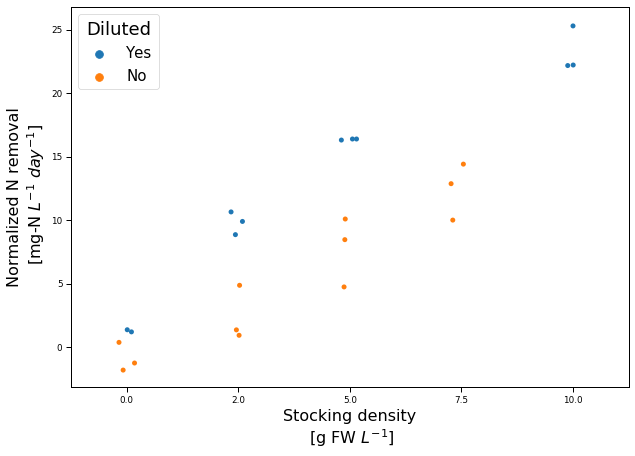

In [68]:
# N_removal_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

fig = plt.figure(figsize =(10, 7)) 
#ax = fig.add_subplot(111) 
# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
#fig.set_xticklabels(['0','2','5','7.5','10'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

fig = sns.stripplot(x = 'density', y = 'N_removal_day', data = dall[(dall.Duration == 'Day')],hue = 'Diluted').set(xlabel='Stocking density\n [g FW $L^{-1}$]', ylabel='Normalized N removal\n [mg-N $L^{-1}$ $day^{-1}$]')
plt.legend(title="Diluted",title_fontsize = 18,fontsize = 15)
#plt.xaxis(fontsize = 15)
#fig = sns.catplot(x = 'density', y = 'N_removal_day', data = dall[(dall.Duration == 'Day')],kind='box')


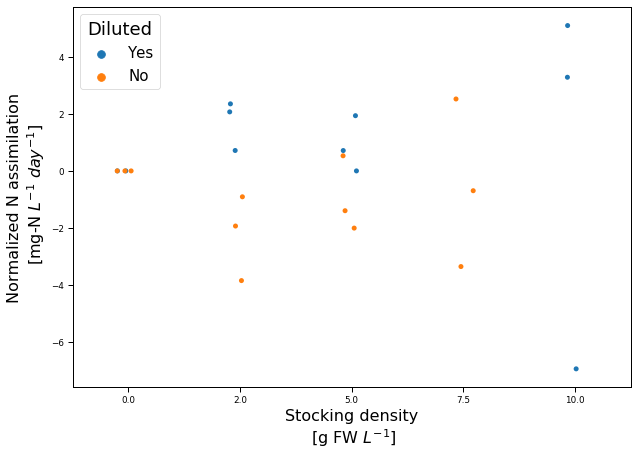

In [69]:
# N_assimilation_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

fig = plt.figure(figsize =(10, 7)) 
#ax = fig.add_subplot(111) 
# combined strip plot - all data
#dall_ND = dall[(dall.Diluted == 'Yes')]
#fig.set_xticklabels(['0','2','5','7.5','10'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

fig = sns.stripplot(x = 'density', y = 'N_assimilation_day', data = dall[(dall.Duration == 'Day')],hue = 'Diluted').set(xlabel='Stocking density\n [g FW $L^{-1}$]', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')
plt.legend(title="Diluted",title_fontsize = 18,fontsize = 15)

#fig = sns.catplot(x = 'density', y = 'N_removal_day', data = dall[(dall.Duration == 'Day')],kind='box')


In [ ]:
# effect of P addition in weekly treatment - N_assimilation_day

d3 = dall[(dall.Exp == 3)&(dall.density >= 0)]

# Mann-Whitney U Test between N_assimilation_day and N_removal_day - density <= 2g FW / l
stats.mannwhitneyu(d3[(d3.P == 'Yes')].N_assimilation_day, d3[(d3.P == 'No')].N_assimilation_day)

In [ ]:
# effect of P addition in weekly treatment - DGR

d3 = dall[(dall.Exp == 3)&(dall.density >= 0)]

# Mann-Whitney U Test between N_assimilation_day and N_removal_day - density <= 2g FW / l
stats.mannwhitneyu(d3[(d3.P == 'Yes')].DGR, d3[(d3.P == 'No')].DGR)

In [ ]:
# DGR with and without P
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
dall_DGR = dall[(dall.Exp == 3)&(dall.density != 0)]
fig = sns.catplot(x = 'P', y = 'DGR', data = dall_DGR,kind='box')
fig.set_xticklabels(['Yes', 'No'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'P', y = 'DGR', data = dall_DGR,color='k').set(xlabel='Added P', ylabel='Daily growth rate\n [$day^{-1}$]')

In [ ]:
# DGR with and without P
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
dall_DGR = dall[(dall.Exp == 3)&(dall.density != 0)]
fig = sns.catplot(x = 'P', y = 'N_assimilation_day', data = dall_DGR,kind='box')
fig.set_xticklabels(['Yes', 'No'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'P', y = 'N_assimilation_day', data = dall_DGR,color='k').set(xlabel='Added P', ylabel='Normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [ ]:
x1

In [ ]:
# N_assimilation_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'N_assimilation_day', data = dall,kind='box')
fig.set_xticklabels(['Day', 'Week'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'N_assimilation_day', data = dall,color='k').set(xlabel='Duration', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [ ]:
# N_assimilation_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
dall_ND = dall[(dall.Diluted == 'Yes')]
fig = sns.catplot(x = 'Duration', y = 'N_removal_day', data = dall_ND,kind='box')
fig.set_xticklabels(['Day', 'Week'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'N_removal_day', data = dall_ND,color='k').set(xlabel='Duration', ylabel='normalized N removal\n [mg-N $L^{-1}$ $day^{-1}$]')

In [ ]:
# N_assimilation_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
dall_1D = dall[(dall.Duration == 'Day')]
fig = sns.catplot(x = 'Exp', y = 'N_removal_day', data = dall_1D,kind='box')
fig.set_xticklabels(['Diluted', 'Non diluted'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Exp', y = 'N_removal_day', data = dall_1D,color='k').set(xlabel='Dilution', ylabel='normalized N removal\n [mg-N $L^{-1}$ $day^{-1}$]')

In [ ]:
# N_assimilation_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
dall_1D = dall[(dall.Duration == 'Day')]
fig = sns.catplot(x = 'Exp', y = 'N_assimilation_day', data = dall_1D,kind='box')
fig.set_xticklabels(['Diluted', 'Non diluted'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Exp', y = 'N_assimilation_day', data = dall_1D,color='k').set(xlabel='Dilution', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [ ]:
# N_assimilation_day in different durations
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'N_assimilation_day', data = dall,kind='box')
fig.set_xticklabels(['Day', 'Week'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'N_assimilation_day', data = dall,color='k').set(xlabel='Duration', ylabel='normalized N assimilation\n [mg-N $L^{-1}$ $day^{-1}$]')

In [ ]:
# DGR in different durations - all weeks together - no scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'DGR', data = dall,kind='box').set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Duration', y = 'DGR', data = dall,color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')

In [ ]:
# N in different durations - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'N', data = dNall,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'N', data = dNall,color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Internal N\n [%g N / g DW]')

In [ ]:
# N in different durations - all weeks together - no scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'N', data = dNall,kind='box').set(xlabel='Fertilization Duration\n [hours]', ylabel='Internal N\n [%g N $g^{-1}$ DW]')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

#fig = sns.stripplot(x = 'Duration', y = 'N', data = dNall,color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Internal N\n [%g N / g DW]')

In [ ]:
# Fertilization efficiency in different durations - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall,color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Fertilizing Efficiency \n [g N assimilated / g N added]')

In [ ]:
# Fertilization efficiency in different durations - all weeks together - no scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall,kind='box').set(xlabel='Fertilization Duration\n [hours]', ylabel='Fertilizing Efficiency \n [g N assimilated $g^{-1}$ N added]')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall,color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Fertilizing Efficiency \n [g N assimilated / g N added]')

In [ ]:
# All DGR results by duration by week
for i in [1,2]:
    print('\nweek: ' + str(i) + '\n')
    print(rp.summary_cont(dall[(dall.Week == i)]['DGR'].groupby(dall[(dall.Week == i)]['Duration'])))

In [ ]:
# All N results by duration by week
for i in [1,2]:
    print('\nweek: ' + str(i) + '\n')
    print(rp.summary_cont(dNall[(dNall.Week == i)]['N'].groupby(dNall[(dNall.Week == i)]['Duration'])))


In [ ]:
# All fertilization efficiency results by duration by week
for i in [1,2]:
    print('\nweek: ' + str(i) + '\n')
    print(rp.summary_cont(dEffall[(dEffall.Week == i)]['Fertilizing_Efficiency'].groupby(dEffall[(dEffall.Week == i)]['Duration'])))

In [ ]:
# DGR/N/Fertilizing Efficiency in different durations - by week

for i in [1,2]:
    # Mann-Whitney U Test between durations of 4 and 168 hours - DGR
    print('\nWeek ' + str(i) + ':\n')
    a = stats.mannwhitneyu(dall[(dall.Week == i)&(dall.Duration == 4)].DGR, dall[(dall.Week == i)&(dall.Duration == 168)].DGR)
    print('DGR: ')
    print(a)

    # Mann-Whitney U Test between durations of 4 and 168 hours - N
    b = stats.mannwhitneyu(dNall[(dNall.Week == i)&(dNall.Duration == 4)].N, dNall[(dNall.Week == i)&(dNall.Duration == 168)].N)
    print('\nN: ')
    print(b)
       
    # Mann-Whitney U Test between durations of 4 and 168 hours - fertilizing efficiency
    c = stats.mannwhitneyu(dEffall[(dEffall.Week == i)&(dEffall.Duration == 4)].Fertilizing_Efficiency, dEffall[(dEffall.Week == i)&(dEffall.Duration == 168)].Fertilizing_Efficiency)
    print('\nFertilizing Efficiency: ')
    print(c)

In [ ]:
# DGR/N/Fertilizing Efficiency in different weeks - by duration

for i in [4,168]:
    # Mann-Whitney U Test between durations of 4 and 168 hours - DGR
    print('\nDuration ' + str(i) + ':\n')
    a = stats.mannwhitneyu(dall[(dall.Duration == i)&(dall.Week == 1)].DGR, dall[(dall.Duration == i)&(dall.Week == 2)].DGR)
    print('DGR: ')
    print(a)

    # Mann-Whitney U Test between durations of 4 and 168 hours - N
    b = stats.mannwhitneyu(dNall[(dNall.Duration == i)&(dNall.Week == 1)].N, dNall[(dNall.Duration == i)&(dNall.Week == 2)].N)
    print('\nN: ')
    print(b)
       
    # Mann-Whitney U Test between durations of 4 and 168 hours - fertilizing efficiency
    c = stats.mannwhitneyu(dEffall[(dEffall.Duration == i)&(dEffall.Week == 1)].Fertilizing_Efficiency, dEffall[(dEffall.Duration == i)&(dEffall.Week == 2)].Fertilizing_Efficiency)
    print('\nFertilizing Efficiency: ')
    print(c)

In [ ]:
# DGR in different durations - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
for i in [1,2]:
    fig = sns.catplot(x = 'Duration', y = 'DGR', data = dall[(dall.Week == i)],kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
    fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    fig = sns.stripplot(x = 'Duration', y = 'DGR', data = dall[(dall.Week == i)],color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')

In [ ]:
# DGR in different durations - by week - no scatter, one plot
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2]:
fig = sns.catplot(x = 'Duration', y = 'DGR', data = dall,kind='box',hue='Week').set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    #fig = sns.stripplot(x = 'Duration', y = 'DGR', data = dall[(dall.Week == i)],color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')

In [ ]:
# N in different durations - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
for i in [1,2]:
    fig = sns.catplot(x = 'Duration', y = 'N', data = dNall[(dNall.Week == i)],kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
    fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    fig = sns.stripplot(x = 'Duration', y = 'N', data = dNall[(dNall.Week == i)],color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Internal N\n [%g N / g DW]')

In [ ]:
# N in different durations - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2]:
fig = sns.catplot(x = 'Duration', y = 'N', data = dNall,kind='box',hue='Week').set(xlabel='Fertilization Duration\n [hours]', ylabel='Internal N\n [%g N $g^{-1}$ DW]')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Duration', y = 'N', data = dNall[(dNall.Week == i)],color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Internal N\n [%g N / g DW]')

In [ ]:
# Fertilizing Efficiency in different durations - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
for i in [1,2]:
    fig = sns.catplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall[(dEffall.Week == i)],kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
    fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    fig = sns.stripplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall[(dEffall.Week == i)],color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Fertilizing Efficiency \n [g N assimilated / g N added]')

In [ ]:
# Fertilizing Efficiency in different durations - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2]:
fig = sns.catplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall,kind='box',hue='Week').set(xlabel='Fertilization Duration\n [hours]', ylabel='Fertilizing Efficiency \n [g N assimilated $g^{-1}$ N added]')
fig.set_xticklabels([4, 168],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Duration', y = 'Fertilizing_Efficiency', data = dEffall[(dEffall.Week == i)],color='k').set(xlabel='Fertilization Duration\n [hours]', ylabel='Fertilizing Efficiency \n [g N assimilated / g N added]')

In [ ]:
# Weekly total added N
dall = df2[(df2.Stage == 'f')&(np.isnan(df2.DW)!= True)&(df2.Treatment != 'Acclimation')&(df2.Comment != 'Exclude')&(df2.Week <= 3)]
dNall = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)&(df2.Treatment != 'Acclimation')&(df2.Comment != 'Exclude')&(df2.Week <= 3)]
dEffall = df2[(df2.Stage == 'f')&(np.isnan(df2.Fertilizing_Efficiency)!= True)&(df2.Treatment != 'Acclimation')&(df2.Comment != 'Exclude')&(df2.Week <= 3)]

In [ ]:
# data summary of duration = 168, by flux (DGR)
dall168 = dall[(dall['Duration'] == 168)]
rp.summary_cont(dall168['DGR'].groupby(dall168['Flux']))

In [ ]:
# data summary of duration = 168, by flux (N)
dNall168 = dNall[(dNall['Duration'] == 168)]
rp.summary_cont(dNall168['N'].groupby(dNall168['Flux']))

In [ ]:
# data summary of duration = 168, by flux (Fertilizing Efficiency)
dEffall168 = dEffall[(dEffall['Duration'] == 168)]
rp.summary_cont(dEffall168['Fertilizing_Efficiency'].groupby(dEffall168['Flux']))

In [ ]:
# kruskal test - comparing DGR in different fluxes

sp.stats.kruskal(dall168[(dall168['Flux'] == 1000)]['DGR'],
                dall168[(dall168['Flux'] == 1500)]['DGR'],
                dall168[(dall168['Flux'] == 2000)]['DGR'])

# There is a significant difference between fluxes

In [ ]:
# kruskal test - comparing N in different fluxes

sp.stats.kruskal(dNall168[(dNall168['Flux'] == 1000)]['N'],
                dNall168[(dNall168['Flux'] == 1500)]['N'],
                dNall168[(dNall168['Flux'] == 2000)]['N'])

# There is a significant difference between fluxes

In [ ]:
# kruskal test - comparing Fertilizing Efficiencies in different fluxes

sp.stats.kruskal(dEffall168[(dEffall168['Flux'] == 1000)]['Fertilizing_Efficiency'],
                dEffall168[(dEffall168['Flux'] == 1500)]['Fertilizing_Efficiency'],
                dEffall168[(dEffall168['Flux'] == 2000)]['Fertilizing_Efficiency'])

# There is a significant difference between fluxes

In [ ]:
# post - hoc multiple comparisons between fluxes - DGR

data = [dall168[(dall168['Flux'] == 1000)]['DGR'],
                dall168[(dall168['Flux'] == 1500)]['DGR'],
                dall168[(dall168['Flux'] == 2000)]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#1000 and 2000

In [ ]:
# post - hoc multiple comparisons between fluxes - N

data = [dNall168[(dNall168['Flux'] == 1000)]['N'],
                dNall168[(dNall168['Flux'] == 1500)]['N'],
                dNall168[(dNall168['Flux'] == 2000)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#1000 and 1500 and 1000 and 2000

In [ ]:
# post - hoc multiple comparisons between fluxes - Fertilizing Efficiency

data = [dEffall168[(dEffall168['Flux'] == 1000)]['Fertilizing_Efficiency'],
                dEffall168[(dEffall168['Flux'] == 1500)]['Fertilizing_Efficiency'],
                dEffall168[(dEffall168['Flux'] == 2000)]['Fertilizing_Efficiency']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#1000 and 2000

In [ ]:
# DGR in different fluxes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Flux', y = 'DGR', data = dall168,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Flux', y = 'DGR', data = dall168,color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Daily growth rate')

In [ ]:
# DGR in different fluxes - all weeks together - without scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Flux', y = 'DGR', data = dall168,kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'DGR', data = dall168,color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Daily growth rate')

In [ ]:
# N in different fluxes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Flux', y = 'N', data = dNall168,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Flux', y = 'N', data = dNall168,color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Internal N\n [%g N / g DW]')

In [ ]:
# N in different fluxes - all weeks together - no scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Flux', y = 'N', data = dNall168,kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Internal N\n [%g N $g^{-1}$ DW]')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'N', data = dNall168,color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Internal N\n [%g N / g DW]')

In [ ]:
# N in different fluxes - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dNall168,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dNall168,color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Fertilizing Efficiency\n [% g assimilated N $g^{-1}$ added N]')

In [ ]:
# N in different fluxes - all weeks together - no scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
fig = sns.catplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dNall168,kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Fertilizing Efficiency\n [% g assimilated N $g^{-1}$ added N]')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dNall168,color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Fertilizing Efficiency\n [% g assimilated N / g added N]')

In [ ]:
# kruskal test - comparing DGR in different fluxes - different weeks
for i in [1,2,3]:
    s = sp.stats.kruskal(dall168[(dall168['Week'] == i)&(dall168['Flux'] == 1000)]['DGR'],
                    dall168[(dall168['Week'] == i)&(dall168['Flux'] == 1500)]['DGR'],
                    dall168[(dall168['Week'] == i)&(dall168['Flux'] == 2000)]['DGR'])
    print('\nWeek ' + str(i) + ':')
    print(s)
# There is a significant difference between fluxes in all weeks

In [ ]:
# post - hoc multiple comparisons between fluxes - DGR, per week
for i in [1,2,3]:
    print('\nWeek: ' + str(i))
    data = [dall168[(dall168['Flux'] == 1000)&(dall168['Week'] == i)]['DGR'],
                    dall168[(dall168['Flux'] == 1500)&(dall168['Week'] == i)]['DGR'],
                    dall168[(dall168['Flux'] == 2000)&(dall168['Week'] == i)]['DGR']]

    s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(s)
#results: Significan difference between:
#1000 and 2000

In [ ]:
# post - hoc multiple comparisons between weeks - DGR, per flux
for i in [1000,1500,2000]:
    print('\nFlux: ' + str(i))
    data = [dall168[(dall168['Week'] == 1)&(dall168['Flux'] == i)]['DGR'],
                    dall168[(dall168['Week'] == 2)&(dall168['Flux'] == i)]['DGR'],
                    dall168[(dall168['Week'] == 3)&(dall168['Flux'] == i)]['DGR']]

    s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(s)
#results: Significan difference between:
#1000 and 2000

In [ ]:
# post - hoc multiple comparisons between weeks - DGR, per flux
#for i in [1000,1500,2000]:
#    print('\nFlux: ' + str(i))
data = [dall168[(dall168['Week'] == 1)&(dall168['Flux'] == 1000)]['DGR'],
                dall168[(dall168['Week'] == 2)&(dall168['Flux'] == 1000)]['DGR'],
                dall168[(dall168['Week'] == 3)&(dall168['Flux'] == 1000)]['DGR'],
                dall168[(dall168['Week'] == 1)&(dall168['Flux'] == 1500)]['DGR'],
                dall168[(dall168['Week'] == 2)&(dall168['Flux'] == 1500)]['DGR'],
                dall168[(dall168['Week'] == 3)&(dall168['Flux'] == 1500)]['DGR'],
                dall168[(dall168['Week'] == 1)&(dall168['Flux'] == 2000)]['DGR'],
                dall168[(dall168['Week'] == 2)&(dall168['Flux'] == 2000)]['DGR'],
                dall168[(dall168['Week'] == 3)&(dall168['Flux'] == 2000)]['DGR']]

s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
print(s)
#results: Significan difference between:
#1000 and 2000

In [ ]:
# DGR in different fluxes - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

for i in [1,2,3]:
    fig = sns.catplot(x = 'Flux', y = 'DGR', data = dall168[(dall168.Week == i)],kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
    fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    fig = sns.stripplot(x = 'Flux', y = 'DGR', data = dall168[(dall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Daily growth rate')

In [ ]:
# DGR in different fluxes - by week - no scatter, one plot
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

#for i in [1,2,3]:
fig = sns.catplot(x = 'Flux', y = 'DGR', data = dall168,hue='Week',kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'DGR', data = dall168[(dall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Daily growth rate')

In [ ]:
# kruskal test - comparing N in different fluxes - different weeks
for i in [1,2,3]:
    s = sp.stats.kruskal(dNall168[(dNall168['Week'] == i)&(dNall168['Flux'] == 1000)]['N'],
                    dNall168[(dNall168['Week'] == i)&(dNall168['Flux'] == 1500)]['N'],
                    dNall168[(dNall168['Week'] == i)&(dNall168['Flux'] == 2000)]['N'])
    print('\nWeek ' + str(i) + ':')
    print(s)
# There is a significant difference between fluxes in all weeks

In [ ]:
# post - hoc multiple comparisons between fluxes - N, per week
for i in [1,2,3]:
    print('\nWeek: ' + str(i))
    data = [dNall168[(dNall168['Flux'] == 1000)&(dNall168['Week'] == i)]['N'],
                    dNall168[(dNall168['Flux'] == 1500)&(dNall168['Week'] == i)]['N'],
                    dNall168[(dNall168['Flux'] == 2000)&(dNall168['Week'] == i)]['N']]

    s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(s)
    
#results: Significan difference between:
#1000 and 2000

In [ ]:
# post - hoc multiple comparisons between weeks - DGR, per flux
for i in [1000,1500,2000]:
    print('\nFlux: ' + str(i))
    data = [dNall168[(dNall168['Week'] == 1)&(dNall168['Flux'] == i)]['N'],
                    dNall168[(dNall168['Week'] == 2)&(dNall168['Flux'] == i)]['N'],
                    dNall168[(dNall168['Week'] == 3)&(dNall168['Flux'] == i)]['N']]

    s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(s)
#results: Significan difference between:
#1000 and 2000

In [ ]:
# N in different fluxes - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

for i in [1,2,3]:
    fig = sns.catplot(x = 'Flux', y = 'N', data = dNall168[(dNall168.Week == i)],kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
    fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    fig = sns.stripplot(x = 'Flux', y = 'N', data = dNall168[(dNall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Internal N\n [% g N / g DW]')

In [ ]:
# N in different fluxes - by week - one plot, no scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

#for i in [1,2,3]:
fig = sns.catplot(x = 'Flux', y = 'N', data = dNall168,hue='Week',kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Internal N\n [% g N $g^{-1}$ DW]')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'N', data = dNall168[(dNall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Internal N\n [% g N / g DW]')

In [ ]:
# N in different fluxes - by week, no scatter, one plot
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

#for i in [1,2,3]:
fig = sns.catplot(x = 'Flux', y = 'N', data = dNall168,hue='Week',kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 / week]', ylabel='Internal N\n [% g N / g DW]')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'N', data = dNall168[(dNall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Internal N\n [% g N / g DW]')

In [ ]:
# kruskal test - comparing Fertilizing Efficiencies in different fluxes - different weeks
for i in [1,2,3]:
    s = sp.stats.kruskal(dEffall168[(dEffall168['Week'] == i)&(dEffall168['Flux'] == 1000)]['Fertilizing_Efficiency'],
                    dEffall168[(dEffall168['Week'] == i)&(dEffall168['Flux'] == 1500)]['Fertilizing_Efficiency'],
                    dEffall168[(dEffall168['Week'] == i)&(dEffall168['Flux'] == 2000)]['Fertilizing_Efficiency'])
    print('\nWeek ' + str(i) + ':')
    print(s)
# There is a significant difference between fluxes in all weeks

In [ ]:
# post - hoc multiple comparisons between fluxes - Fertilizing Efficiency
for i in [1,2,3]:
    print('\nWeek: ' + str(i))
    data = [dEffall168[(dEffall168['Flux'] == 1000)&(dEffall168['Week'] == i)]['Fertilizing_Efficiency'],
                    dEffall168[(dEffall168['Flux'] == 1500)&(dEffall168['Week'] == i)]['Fertilizing_Efficiency'],
                    dEffall168[(dEffall168['Flux'] == 2000)&(dEffall168['Week'] == i)]['Fertilizing_Efficiency']]

    s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(s)
#results: Significan difference between:
#1000 and 2000

In [ ]:
# post - hoc multiple comparisons between weeks - DGR, per flux
for i in [1000,1500,2000]:
    print('\nFlux: ' + str(i))
    data = [dEffall168[(dEffall168['Week'] == 1)&(dEffall168['Flux'] == i)]['Fertilizing_Efficiency'],
                    dEffall168[(dEffall168['Week'] == 2)&(dEffall168['Flux'] == i)]['Fertilizing_Efficiency'],
                    dEffall168[(dEffall168['Week'] == 3)&(dEffall168['Flux'] == i)]['Fertilizing_Efficiency']]

    s = scp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(s)
#results: Significan difference between:
#1000 and 2000

In [ ]:
# N in different fluxes - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

for i in [1,2,3]:
    fig = sns.catplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dEffall168[(dEffall168.Week == i)],kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
    fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    fig = sns.stripplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dEffall168[(dEffall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Fertilizing Efficiency \n [% g Assimilated N / g Added N]')

In [ ]:
# N in different fluxes - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

#for i in [1,2,3]:
fig = sns.catplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dEffall168,hue='Week',kind='box').set(xlabel='Total weekly nutrient addition\n [µM NH4 $week^{-1}$]', ylabel='Fertilizing Efficiency \n [% g Assimilated N $g^{-1}$ Added N]')
fig.set_xticklabels([1000, 1500, 2000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Flux', y = 'Fertilizing_Efficiency', data = dEffall168[(dEffall168.Week == i)],color='k').set(xlabel='Total weekly nutrient addition\n [µM NH4/week]', ylabel='Fertilizing Efficiency \n [% g Assimilated N / g Added N]')

In [ ]:
# Effects of amplitudes (treatments)

In [ ]:
# data summary of flux = 1000, by treatment (DGR)
dall1000 = dall[(dall['Duration'] == 168)&(dall['Flux'] == 1000)]
print(rp.summary_cont(dall1000['DGR'].groupby(dall1000['Amplitude'])))

# data summary of flux = 1000, by flux (N)
dNall1000 = dNall[(dNall['Duration'] == 168)&(dNall['Flux'] == 1000)]
print(rp.summary_cont(dNall1000['N'].groupby(dNall1000['Amplitude'])))

# data summary of duration = 168, by flux (Fertilizing Efficiency)
dEffall1000 = dEffall[(dEffall['Duration'] == 168)&(dEffall['Flux'] == 1000)]
print(rp.summary_cont(dEffall1000['Fertilizing_Efficiency'].groupby(dEffall1000['Amplitude'])))

In [ ]:
# kruskal test - comparing N in different amplitudes
print('\nDGR: ')
print(sp.stats.kruskal(dall1000[(dall1000['Amplitude'] == 1000)]['DGR'],
                dall1000[(dall1000['Amplitude'] == 500)]['DGR'],
                dall1000[(dall1000['Amplitude'] == 200)]['DGR']))

print('\nN: ')
print(sp.stats.kruskal(dNall1000[(dNall1000['Amplitude'] == 1000)]['N'],
                dNall1000[(dNall1000['Amplitude'] == 500)]['N'],
                dNall1000[(dNall1000['Amplitude'] == 200)]['N']))

print('\nFertilizing Efficiency: ')
print(sp.stats.kruskal(dEffall1000[(dEffall1000['Amplitude'] == 1000)]['Fertilizing_Efficiency'],
                dEffall1000[(dEffall1000['Amplitude'] == 500)]['Fertilizing_Efficiency'],
                dEffall1000[(dEffall1000['Amplitude'] == 200)]['Fertilizing_Efficiency']))


In [ ]:
# post - hoc multiple comparisons between treatments
print('\nDGR: ')
data = [dall1000[(dall1000['Amplitude'] == 1000)]['DGR'],
                dall1000[(dall1000['Amplitude'] == 500)]['DGR'],
                dall1000[(dall1000['Amplitude'] == 200)]['DGR']]

print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

print('\nN: ')
data = [dNall1000[(dNall1000['Amplitude'] == 1000)]['N'],
                dNall1000[(dNall1000['Amplitude'] == 500)]['N'],
                dNall1000[(dNall1000['Amplitude'] == 200)]['N']]

print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

print('\nFertilizing Efficiency: ')
data = [dEffall1000[(dEffall1000['Amplitude'] == 1000)]['Fertilizing_Efficiency'],
                dEffall1000[(dEffall1000['Amplitude'] == 500)]['Fertilizing_Efficiency'],
                dEffall1000[(dEffall1000['Amplitude'] == 200)]['Fertilizing_Efficiency']]

print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

In [ ]:
# Exp #5

# data summary of flux = 1000, by treatment (DGR)
dall1000_5 = dall[(dall['Duration'] == 168)&(dall['Flux'] == 1000)&(dall['Exp'] == 5)]
print(rp.summary_cont(dall1000_5['DGR'].groupby(dall1000_5['Treatment'])))

# data summary of flux = 1000, by flux (N)
dNall1000_5= dNall[(dNall['Duration'] == 168)&(dNall['Flux'] == 1000)&(dNall['Exp'] == 5)]
print(rp.summary_cont(dNall1000_5['N'].groupby(dNall1000_5['Treatment'])))

# data summary of duration = 168, by flux (Fertilizing Efficiency)
dEffall1000_5 = dEffall[(dEffall['Duration'] == 168)&(dEffall['Flux'] == 1000)&(dEffall['Exp'] == 5)]
print(rp.summary_cont(dEffall1000_5['Fertilizing_Efficiency'].groupby(dEffall1000_5['Treatment'])))

In [ ]:
# post - hoc multiple comparisons between treatments - DGR - exp #5
data = [dall1000_5[(dall1000_5['Amplitude'] == 1000)]['DGR'],
                dall1000_5[(dall1000_5['Amplitude'] == 500)]['DGR'],
                dall1000_5[(dall1000_5['Amplitude'] == 200)]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

In [ ]:
# DGR in different amplitudes -  exp 5 in red
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

fig = sns.catplot(x = 'Amplitude', y = 'DGR', data = dall1000,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([200, 500, 1000],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Amplitude', y = 'DGR', data = dall1000,color = 'k').set(xlabel='Amplitude\n [µM NH4]', ylabel='Daily growth rate')
colors = ['r','k','k']
for i in [1,2,3]:
    fig = sns.stripplot(x = 'Amplitude', y = 'DGR', data = dall1000[(dall1000.Exp == 5)&(dall1000.Week == i)],color = colors[i-1]).set(xlabel='Amplitude\n [µM NH4]', ylabel='Daily growth rate')

In [ ]:
# N in different amplitudes -  exp 5 in red
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

fig = sns.catplot(x = 'Amplitude', y = 'N', data = dNall1000,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 500, 200],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Amplitude', y = 'N', data = dNall1000,color = 'k').set(xlabel='Amplitude\n [µM NH4]', ylabel='Daily growth rate')
colors = ['r','k','k']
for i in [1,2,3]:
    fig = sns.stripplot(x = 'Amplitude', y = 'N', data = dNall1000[(dNall1000.Exp == 5)&(dNall1000.Week == i)],color = colors[i-1]).set(xlabel='Amplitude\n [µM NH4]', ylabel='Internal N\n[% g N $g^{-1}$ DW]')

In [ ]:
# N in different amplitudes -  exp 5 in red
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

fig = sns.catplot(x = 'Amplitude', y = 'Fertilizing_Efficiency', data = dEffall1000,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels([1000, 500, 200],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#fig = sns.stripplot(x = 'Amplitude', y = 'N', data = dNall1000,color = 'k').set(xlabel='Amplitude\n [µM NH4]', ylabel='Daily growth rate')
colors = ['r','k','k']
for i in [1,2,3]:
    fig = sns.stripplot(x = 'Amplitude', y = 'Fertilizing_Efficiency', data = dEffall1000[(dNall1000.Exp == 5)&(dNall1000.Week == i)],color = colors[i-1]).set(xlabel='Amplitude\n [µM NH4]', ylabel='Fertilizing Efficiency\n[% g N Assimilated $g^{-1}$ N Added]')

In [ ]:
# Exp #5

In [ ]:
# kruskal test - comparing N in different treatments

sp.stats.kruskal(dall1000_5[(dall1000_5['Amplitude'] == 1000)]['DGR'],
                dall1000_5[(dall1000_5['Amplitude'] == 500)]['DGR'],
                dall1000_5[(dall1000_5['Amplitude'] == 200)]['DGR'])

# There is a significant difference between fluxes

In [ ]:
# post - hoc multiple comparisons between treatments - DGR
data = [dall1000_5[(dall1000_5['Amplitude'] == 1000)]['DGR'],
                dall1000_5[(dall1000_5['Amplitude'] == 500)]['DGR'],
                dall1000_5[(dall1000_5['Amplitude'] == 200)]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

In [ ]:
# post - hoc multiple comparisons between treatments - N
data = [dNall1000_5[(dNall1000_5['Amplitude'] == 1000)]['N'],
                dNall1000_5[(dNall1000_5['Amplitude'] == 500)]['N'],
                dNall1000_5[(dNall1000_5['Amplitude'] == 200)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

In [ ]:
# Pearson DGR week 1

from scipy.stats import pearsonr 
   
list1 = [200,500,1000] 
list2 = [0.6,10.3,22.3] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 

In [ ]:
# kruskal test - comparing N in different treatments

sp.stats.kruskal(dNall1000_5[(dNall1000_5['Amplitude'] == 1000)]['N'],
                dNall1000_5[(dNall1000_5['Amplitude'] == 500)]['N'],
                dNall1000_5[(dNall1000_5['Amplitude'] == 200)]['N'])

# There is a significant difference between fluxes

In [ ]:
# post - hoc multiple comparisons between treatments - N
data = [dNall1000_5[(dNall1000_5['Amplitude'] == 1000)]['N'],
                dNall1000_5[(dNall1000_5['Amplitude'] == 500)]['N'],
                dNall1000_5[(dNall1000_5['Amplitude'] == 200)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#1000 and 2000

In [ ]:
# kruskal test - comparing Fertilizing Efficiencies in different treatments

sp.stats.kruskal(dEffall1000_5[(dEffall1000_5['Amplitude'] == 1000)]['Fertilizing_Efficiency'],
                dEffall1000_5[(dEffall1000_5['Amplitude'] == 500)]['Fertilizing_Efficiency'],
                dEffall1000_5[(dEffall1000_5['Amplitude'] == 200)]['Fertilizing_Efficiency'])

# There is a significant difference between fluxes

In [ ]:
# post - hoc multiple comparisons between treatments - Fertilizing Efficiency
data = [dEffall1000_5[(dEffall1000_5['Amplitude'] == 1000)]['Fertilizing_Efficiency'],
                dEffall1000_5[(dEffall1000_5['Amplitude'] == 500)]['Fertilizing_Efficiency'],
                dEffall1000_5[(dEffall1000_5['Amplitude'] == 200)]['Fertilizing_Efficiency']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#1000 and 2000

In [ ]:
# normality test for all N results

In [ ]:
# normality test for all fertilization efficiency results

In [ ]:
# For model - calibration, validation and excluded data

In [ ]:
dd = df2[(df2.Stage != 'i')&(np.isnan(df2.DW)!= True)&(df2.Treatment != 'Acclimation')&(df2.Sporulated != 'Yes')&(df2.Exp != 1)&(df2.Exp != 2)&(df2.Exp != 5)&(df2.Comment != 'Exclude')&(df2.Week <= 3)]
rp.summary_cont(dd['DW'].groupby(dd['Treatment']))

In [ ]:
ddval = df2[(df2.Stage != 'i')&(np.isnan(df2.DW)!= True)&(df2.Treatment != 'Acclimation')&(df2.Comment != 'Exclude')&(df2.Week <= 3)&(df2.Treatment != '2000/1/4')&(df2.Treatment != '500/1/4')&(df2.Exp != 3)&(df2.Exp != 4)]
rp.summary_cont(ddval['N'].groupby(ddval['Treatment']))
rp.summary_cont(ddval['DW'].groupby(ddval['Treatment']))

In [ ]:
ddexc = df2[(df2.Stage != 'i')&(np.isnan(df2.DW)!= True)&(df2.Treatment != 'Acclimation')&(df2.Sporulated == 'Yes')&(df2.Week <= 3)&(df2.Treatment != '2000/1/4')&(df2.Treatment != '500/1/4')]
rp.summary_cont(ddexc['N'].groupby(ddexc['Treatment']))
rp.summary_cont(ddexc['DW'].groupby(ddexc['Treatment']))

In [ ]:
ddN = df2[(df2.Stage != 'i')&(np.isnan(df2.N)!= True)&(df2.Treatment != 'Acclimation')&(df2.Exp != 1)&(df2.Exp != 2)&(df2.Exp != 5)&(df2.Comment != 'Exclude')&(df2.Week <= 3)]
rp.summary_cont(ddN['N'].groupby(ddN['Treatment']))

In [ ]:
ddNval = df2[(df2.Stage != 'i')&(np.isnan(df2.N)!= True)&(df2.Treatment != 'Acclimation')&(df2.Comment != 'Exclude')&(df2.Week <= 3)&(df2.Treatment != '2000/1/4')&(df2.Treatment != '500/1/4')&(df2.Exp != 3)&(df2.Exp != 4)]
rp.summary_cont(ddNval['N'].groupby(ddNval['Treatment']))

In [ ]:
# Statistical analysis for indoor experiments results
# 1. Check normal distribution of DGR in 500/2/168 treatment
# 2. ANOVA / Multiple T-test 2-side unequal...
# a. Effect of Date, frequency and concentration (and also weighing and trimming) on DGR/Nint (all data combined)
# b. Effect of Date, frequency and concentration (and also weighing and trimming) on DGR/Nint (data divided by week)


In [ ]:
# kruskal test - diffrences between exp
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]


dd = d[(d['Treatment'] == '500/2/168')]

#dd = dd[(dd['Week'] == i)]
pDGR = sp.stats.kruskal(dd[(dd['Exp'] == 2)]['DGR'],
                        dd[(dd['Exp'] == 3)]['DGR'],
                        dd[(dd['Exp'] == 4)]['DGR'],
                        dd[(dd['Exp'] == 5)]['DGR'])


#print(len(d168[(d168['Flux'] == 1500)].DGR))
print(pDGR)
# There is a significant difference between frequencies

In [ ]:
# kruskal test - diffrences between exp
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]


dd = d[(d['Treatment'] == '1000/1/168')]

#dd = dd[(dd['Week'] == i)]
pDGR = sp.stats.kruskal(dd[(dd['Exp'] == 1)]['DGR'],
                        dd[(dd['Exp'] == 2)]['DGR'],
                        dd[(dd['Exp'] == 4)]['DGR'],
                        dd[(dd['Exp'] == 5)]['DGR'])


#print(len(d168[(d168['Flux'] == 1500)].DGR))
print(pDGR)
# There is a significant difference between frequencies

In [ ]:
# kruskal test - diffrences between exp
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]


ddN = dN[(dN['Treatment'] == '500/2/168')]

#dd = dd[(dd['Week'] == i)]
pN = sp.stats.kruskal(ddN[(ddN['Exp'] == 2)]['N'],
                        ddN[(ddN['Exp'] == 3)]['N'],
                        ddN[(ddN['Exp'] == 4)]['N'],
                        ddN[(ddN['Exp'] == 5)]['N'])


#print(len(d168[(d168['Flux'] == 1500)].DGR))
print(pN)
# There is a significant difference between frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# kruskal test - diffrences between exp
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]


ddN = dN[(dN['Treatment'] == '1000/1/168')]

#dd = dd[(dd['Week'] == i)]
pN = sp.stats.kruskal(ddN[(ddN['Exp'] == 1)]['N'],
                        ddN[(ddN['Exp'] == 2)]['N'],
                        ddN[(ddN['Exp'] == 4)]['N'],
                        ddN[(ddN['Exp'] == 5)]['N'])


#print(len(d168[(d168['Flux'] == 1500)].DGR))
print(pN)
# There is a significant difference between frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# kruskal test - diffrences between exp
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]

for i in [1,2,3]:
    dd = d[(d['Treatment'] == '500/2/168')]

    dd = dd[(dd['Week'] == i)]
    pDGR = sp.stats.kruskal(dd[(dd['Exp'] == 2)]['DGR'],
                            dd[(dd['Exp'] == 3)]['DGR'],
                            dd[(dd['Exp'] == 4)]['DGR'],
                            dd[(dd['Exp'] == 5)]['DGR'])
                            
        
    #print(len(d168[(d168['Flux'] == 1500)].DGR))
    print(pDGR)
# There is a significant difference between frequencies

# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# kruskal test - diffrences between exp
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]

for i in [1,2,3]:
    dd = d[(d['Treatment'] == '1000/1/168')]

    dd = dd[(dd['Week'] == i)]
    pDGR = sp.stats.kruskal(dd[(dd['Exp'] == 1)]['DGR'],
                            dd[(dd['Exp'] == 2)]['DGR'],
                            dd[(dd['Exp'] == 4)]['DGR'],
                            dd[(dd['Exp'] == 5)]['DGR'])
                            
        
    #print(len(d168[(d168['Flux'] == 1500)].DGR))
    print(pDGR)
# There is a significant difference between frequencies

# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# kruskal test - diffrences between exp by week (N)
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]

for i in [1,2,3]:
    ddN = dN[(dN['Treatment'] == '500/2/168')]

    ddN = ddN[(ddN['Week'] == i)]
    pN = sp.stats.kruskal(ddN[(ddN['Exp'] == 2)]['N'],
                            ddN[(ddN['Exp'] == 3)]['N'],
                            ddN[(ddN['Exp'] == 4)]['N'],
                            ddN[(ddN['Exp'] == 5)]['N'])
                            
        
    #print(len(d168[(d168['Flux'] == 1500)].DGR))
    print(pN)
# There is a significant difference between frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# kruskal test - diffrences between exp by week (N)
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]

for i in [1,2,3]:
    ddN = dN[(dN['Treatment'] == '1000/1/168')]

    ddN = ddN[(ddN['Week'] == i)]
    pN = sp.stats.kruskal(ddN[(ddN['Exp'] == 1)]['N'],
                            ddN[(ddN['Exp'] == 2)]['N'],
                            ddN[(ddN['Exp'] == 4)]['N'],
                            ddN[(ddN['Exp'] == 5)]['N'])
                            
        
    #print(len(d168[(d168['Flux'] == 1500)].DGR))
    print(pN)
# There is a significant difference between frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments by weeks - 500/2/168

for i in [1,2,3]:
    print('\nWeek: ' + str(i))
    d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
    dd = d[(d['Treatment'] == '500/2/168')&(d['Week']==i)]

    data = [dd[(dd['Exp'] == 2)]['DGR'],
                                dd[(dd['Exp'] == 3)]['DGR'],
                                dd[(dd['Exp'] == 4)]['DGR'],
                                dd[(dd['Exp'] == 5)]['DGR']]

    print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

#No significant difference between any two frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments - 1000/1/168

#for i in [1,2,3]:
#    print('\nWeek: ' + str(i))
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dd = d[(d['Treatment'] == '1000/1/168')]

data = [dd[(dd['Exp'] == 1)]['DGR'],
                            dd[(dd['Exp'] == 2)]['DGR'],
                            dd[(dd['Exp'] == 4)]['DGR'],
                            dd[(dd['Exp'] == 5)]['DGR']]

print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

#No significant difference between any two frequencies
# initial internal N:
# Exp 1: 1.85
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments by weeks - 1000/1/168

for i in [1,2,3]:
    print('\nWeek: ' + str(i))
    d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
    dd = d[(d['Treatment'] == '1000/1/168')&(d['Week']==i)]

    data = [dd[(dd['Exp'] == 1)]['DGR'],
                                dd[(dd['Exp'] == 2)]['DGR'],
                                dd[(dd['Exp'] == 4)]['DGR'],
                                dd[(dd['Exp'] == 5)]['DGR']]

    print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

#No significant difference between any two frequencies
# initial internal N:
# Exp 1: 1.85
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments  - 1000/1/168 - N

dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]

ddN = dN[(dN['Treatment'] == '1000/1/168')]

data = [ddN[(ddN['Exp'] == 1)]['N'],
                            ddN[(ddN['Exp'] == 2)]['N'],
                            ddN[(ddN['Exp'] == 4)]['N'],
                            ddN[(ddN['Exp'] == 5)]['N']]

print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

#No significant difference between any two frequencies
# initial internal N:
# Exp 1: 1.85
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments by weeks - 1000/1/168

dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]
for i in [1,2,3]:
    print('\nWeek: ' + str(i))
    #d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
    ddN = dN[(dN['Treatment'] == '1000/1/168')&(d['Week']==i)]

    data = [ddN[(ddN['Exp'] == 1)]['N'],
                                ddN[(ddN['Exp'] == 2)]['N'],
                                ddN[(ddN['Exp'] == 4)]['N'],
                                ddN[(ddN['Exp'] == 5)]['N']]

    print(scp.posthoc_dunn(data, p_adjust = 'bonferroni'))

#No significant difference between any two frequencies
# initial internal N:
# Exp 1: 1.85
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments by weeks - week 1

i = 1
d = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
dd = d[(d['Treatment'] == '1000/1/168')&(d['Week']==i)]

data = [dd[(dd['Exp'] == 1)]['DGR'],
                            dd[(dd['Exp'] == 2)]['DGR'],
                            dd[(dd['Exp'] == 4)]['DGR'],
                            dd[(dd['Exp'] == 5)]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#No significant difference between any two frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments by weeks - week 1

i = 1
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]
ddN = dN[(dN['Treatment'] == '500/2/168')&(dN['Week']==i)]

data = [ddN[(ddN['Exp'] == 2)]['N'],
                            ddN[(ddN['Exp'] == 3)]['N'],
                            ddN[(ddN['Exp'] == 4)]['N'],
                            ddN[(ddN['Exp'] == 5)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#No significant difference between any two frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# post - hoc multiple comparisons between experiments by weeks - week 1

i = 1
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]
ddN = dN[((dN['Treatment'] == '1000/1/168')&(dN['Week']==i))]

data = [ddN[(ddN['Exp'] == 1)]['N'],
                            ddN[(ddN['Exp'] == 2)]['N'],
                            ddN[(ddN['Exp'] == 4)]['N'],
                            ddN[(ddN['Exp'] == 5)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#No significant difference between any two frequencies
# initial internal N:
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['DGR'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['Exp']))

In [ ]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['N'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['Exp']))

In [ ]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['Fertilizing_Efficiency'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')]['Exp']))

In [ ]:
# growth rates in treatment 500/2/168 in different experiments

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='')
SA1_W_DGR.set_xticklabels(['2,3,4,5'])
SA1_W_DGR.set_xticklabels([2,3,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],color='k').set(xlabel='\n Experiment #', ylabel='Daily growth rate')


In [ ]:
# growth rates in treatment 500/2/168 in different experiments - no scatter

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='\n Run #', ylabel='Daily growth rate')
SA1_W_DGR.set_xticklabels(['2,3,4,5'])
SA1_W_DGR.set_xticklabels([2,3,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],color='k').set(xlabel='\n Experiment #', ylabel='Daily growth rate')


In [ ]:
# N in treatment 500/2/168 in different experiments - no scatter

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='\n Run #', ylabel='Internal N\n[% g N $g^{-1}$ DW]')
SA1_W_DGR.set_xticklabels(['2,3,4,5'])
SA1_W_DGR.set_xticklabels([2,3,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],color='k').set(xlabel='\n Experiment #', ylabel='Internal N\n[% g N/ g DW]')


In [ ]:
# Fertilizing Efficiency in treatment 500/2/168 in different experiments - no scatter

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'Fertilizing_Efficiency', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='\n Run #', ylabel='Fertilizing Efficiency\n[% g Assimilated N $g^{-1}$ Added N]')
SA1_W_DGR.set_xticklabels(['2,3,4,5'])
SA1_W_DGR.set_xticklabels([2,3,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],color='k').set(xlabel='\n Experiment #', ylabel='Internal N\n[% g N/ g DW]')


In [ ]:
# N in treatment 500/2/168 in different experiments

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],kind='box').set(xlabel='')
SA1_W_DGR.set_xticklabels(['2,3,4,5'])
SA1_W_DGR.set_xticklabels([2,3,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],color='k').set(xlabel='\n Experiment #', ylabel='Internal N\n[% g N/ g DW]')


In [ ]:
# growth rates in different experiments - by week (DGR)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
from sklearn.linear_model import LinearRegression

#for i in [2,3,4,5]:
    #SA1_EXP_DGR_W = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == i)],kind='box')
ax0 = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue='Exp',kind = 'strip',col='Exp').set(xlabel='Week #', ylabel='Daily growth rate')
ax0.set_xticklabels([1,2,3],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
    # Initial internal N:    
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

# S.A #1 - Week effect on DGR

#i = 2
#x = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Exp == i)].Week
#y = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Exp == i)].DGR


#fig,ax0 = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
#ax0.plot(x[4:-1],y[4:-1],'.',markersize=6,color = 'k')
#ax0.plot(x[0:3],y[0:3],'.',markersize=6,color = 'r')


#mm, bb = np.polyfit(x, y, 1)
#xx = np.array(x).reshape((-1, 1))
#model = LinearRegression()
#model.fit(xx, y)
#model = LinearRegression().fit(xx, y)
#r_sq = model.score(xx, y)

#ax0.plot(x, mm*x + bb,'--',color = 'orange',markersize=6)

#ax0.set_ylabel('Daily growth rate', fontsize=12, weight='bold')
#ax0.set_xlabel('Time\n[Week]', fontsize=12, weight='bold')

#ax0.xlabel('Week')
#ax0.ylabel('DGR')

#ax0.legend([['$R^{2}$ = ' + str(round(r_sq,2)) + ', y = ' + str(round(mm,2)) + 'x +' + str(round(bb,2))]])

In [ ]:
# N in different treatments - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2,3]:
    #SA1_EXP_N_W = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == i)],kind='box')
SA1_EXP_N_W = sns.catplot(x = 'Week', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')],hue='Exp',kind='strip',col='Exp').set(xlabel='Week #', ylabel='Internal N \n [% g N $g^{-1}$ DW]')
SA1_EXP_N_W.set_xticklabels([1,2,3],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

# Initial internal N:    
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')]['DGR'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')]['Exp']))

In [ ]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')]['N'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')]['Exp']))

In [ ]:
rp.summary_cont(df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')]['Fertilizing_Efficiency'].groupby(df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')]['Exp']))

In [ ]:
# growth rates in treatment 1000/1/168 in different experiments

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],kind='box').set(xlabel='')
SA1_W_DGR.set_xticklabels(['1,2,4,5'])
SA1_W_DGR.set_xticklabels([1,2,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],color='k').set(xlabel='\n Experiment #', ylabel='Daily growth rate')


In [ ]:
# growth rates in treatment 1000/1/168 in different experiments - no scatter

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],kind='box').set(xlabel='\n Run #', ylabel='Daily growth rate')
SA1_W_DGR.set_xticklabels(['1,2,4,5'])
SA1_W_DGR.set_xticklabels([1,2,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],color='k').set(xlabel='\n Experiment #', ylabel='Daily growth rate')


In [ ]:
# N in treatment 1000/1/168 in different experiments

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],kind='box').set(xlabel='')
SA1_W_DGR.set_xticklabels(['1,2,4,5'])
SA1_W_DGR.set_xticklabels([1,2,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_W_DGR = sns.stripplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],color='k').set(xlabel='\n Experiment #', ylabel='Internal N\n[% g N/ g DW]')


In [ ]:
# N in treatment 1000/1/168 in different experiments - no scatter

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],kind='box').set(xlabel='\n Run #', ylabel='Internal N\n[% g N $g^{-1}$ DW]')
#SA1_W_DGR.set_xticklabels(['1,2,4,5'])
SA1_W_DGR.set_xticklabels([1,2,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#A1_W_DGR = sns.stripplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],color='k').set(xlabel='\n Experiment #', ylabel='Internal N\n[% g N/ g DW]')


In [ ]:
# Fertilizing Efficiency in treatment 1000/1/168 in different experiments - no scatter

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_W_DGR = sns.catplot(x = 'Exp', y = 'Fertilizing_Efficiency', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],kind='box').set(xlabel='\n Run #', ylabel='Fertilizing Efficiency\n[% g assimilated N $g^{-1}$ added N]')
#SA1_W_DGR.set_xticklabels(['1,2,4,5'])
SA1_W_DGR.set_xticklabels([1,2,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#A1_W_DGR = sns.stripplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],color='k').set(xlabel='\n Experiment #', ylabel='Internal N\n[% g N/ g DW]')


In [ ]:
# growth rates in different experiments - by week (DGR)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2,3]:
    #SA1_EXP_DGR_W = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == i)],kind='box')
SA1_EXP_DGR_W = sns.catplot(x = 'Week', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],hue='Exp',kind = 'strip',col='Exp').set(xlabel='Week #', ylabel='Daily growth rate')
SA1_EXP_DGR_W.set_xticklabels([1,2,3],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
# Initial internal N:    
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# N in different experiments - by week (DGR)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2,3]:
    #SA1_EXP_DGR_W = sns.catplot(x = 'Exp', y = 'DGR', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == i)],kind='box')
SA1_EXP_DGR_W = sns.catplot(x = 'Week', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],hue='Exp',kind = 'strip',col='Exp').set(xlabel='Week #', ylabel='Internal N\n[% g N $g^{-1}$ DW]')
SA1_EXP_DGR_W.set_xticklabels([1,2,3],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
# Initial internal N:    
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3

In [ ]:
# All fertilization efficiency results by treatment
dd = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]

rp.summary_cont(dd[(dd.Treatment == '1000/1/168')]['DGR'].groupby(dd['Exp']))

In [ ]:
# All fertilization efficiency results by treatment
dd = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
for i in [1,2,3]:
    print(rp.summary_cont(dd[(dd.Treatment == '500/2/168')&(dd.Week == i)]['DGR'].groupby(dd['Exp'])))

In [ ]:
# All fertilization efficiency results by treatment
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]
for i in [1,2,3]:
    print(rp.summary_cont(dN[(dN.Treatment == '500/2/168')&(dN.Week == i)]['N'].groupby(dN['Exp'])))

In [ ]:
# Pearson DGR Exp 1 and 2,1000/1/168

from scipy.stats import pearsonr 
   
list1 = [1,2,3] 
list2 = [1.744,2.837,2.986] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 2, 1000/1/168: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 
 
list1 = [1,2,3] 
list2 = [3.365,2.5025,2.805] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 4, 1000/1/168: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 

In [ ]:
# Pearson DGR Exp 1 and 2,1000/1/168

from scipy.stats import pearsonr 
   
list1 = [1,2,3] 
list2 = [0.281,0.0817,0.1329] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 2, 1000/1/168: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 
 
list1 = [1,2,3] 
list2 = [0.0476,0.2067,0.2571] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 4, 1000/1/168: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 

In [ ]:
# All fertilization efficiency results by treatment
dd = df2[(df2.Stage == 'f')&(np.isnan(df2.DGR)!= True)]
for i in [1,2,3]:
    print(rp.summary_cont(dd[(dd.Treatment == '1000/1/168')&(dd.Week == i)]['DGR'].groupby(dd['Exp'])))

In [ ]:
# All fertilization efficiency results by treatment
dN = df2[(df2.Stage == 'f')&(np.isnan(df2.N)!= True)]
for i in [1,2,3]:
    print(rp.summary_cont(dd[(dd.Treatment == '1000/1/168')&(dd.Week == i)]['N'].groupby(dd['Exp'])))

In [ ]:
# Pearson DGR Exp 1 and 2,1000/1/168

from scipy.stats import pearsonr 
   
list1 = [1,2,3] 
list2 = [0.2235,0.0833,0.0622] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 1, 1000/1/168: %.3f' % corr) 
  
 
 
list1 = [1,2,3] 
list2 = [0.2515,0.0472,0.0905] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 2, 1000/1/168: %.3f' % corr) 

list1 = [1,2,3] 
list2 = [0.145,0.282,0.3324] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 4, 1000/1/168: %.3f' % corr)

In [ ]:
# Pearson DGR Exp 1 and 2,1000/1/168

from scipy.stats import pearsonr 
   
list1 = [1,2,3] 
list2 = [2.088,2.818,3.41] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 1, 1000/1/168: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 
 
list1 = [1,2,3] 
list2 = [1.705,2.98,3.24] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 2, 1000/1/168: %.3f' % corr) 

list1 = [1,2,3] 
list2 = [2.48,2.377,2.709] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('\nPearsons correlation for exp 4, 1000/1/168: %.3f' % corr) 


In [ ]:
# N in different treatments - by week
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,2,3]:
    #SA1_EXP_N_W = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '500/2/168')&(df2.Week == i)],kind='box')
SA1_EXP_N_W = sns.catplot(x = 'Exp', y = 'N', data = df2[(df2.Stage == 'f')&(df2.Treatment == '1000/1/168')],hue='Exp',kind='strip',col='Week').set(xlabel='Experiment #', ylabel='Internal N \n [% gN / gDW]')
SA1_EXP_N_W.set_xticklabels([1,2,4,5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})

# Initial internal N:    
# Exp 2: 2.05
# Exp 3: 1.57
# Exp 4: 3.00
# Exp 5: 1.3